<h1>Importing Data and Looking at Its Features


In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
hotels_data=pd.read_csv("hotel_bookings.csv")

<h4> Imp: Since the Data harge many rows and columns. The below statements helps to makes the window scrollable and displays all rows/columns without trimming them

In [70]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [71]:
hotels_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<h3>Checking the Shape of DataSet

In [72]:
hotels_data.shape

(119390, 32)

<h3>Looking at the Columns to understand the Dataset

In [73]:
hotels_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [74]:
hotels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
hotels_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<h3>Since there are missing values in the Dataset. Let's try to fix them.</h3>
<pre>There are missing values in
    1. Childen
    2. Country
    3. Agent
    4. Company</pre>

 <h4> Task: And Since children  has least number of missing values in it. Lets fix this first</h4>

In [76]:
# Checking for the maximum element in the Children. (here I am still figuring out what metric to use to fill these missing values)


''' Finding the highest number of children in the Dataset and checking how many people has this number. Also basically I should plot and see where 
the number mostly lies between '''
most_children=hotels_data['children'].max()
print("Highest number of children is : ",most_children)

# Also the below statement resulted only 1 row. So there is only 1 family with 10 children
hotels_data[hotels_data["children"]==10]


# Lets now check on what dates the missing fields of children were entered/given.
hotels_data[hotels_data["children"].isnull()]
# (or) hotels_data[hotels_data["children"].isna()]


# Now I am thinking to find a proper graph to visualize this data




Highest number of children is :  10.0


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


<h4> To make out plotting Easier to find number of children for each day I am extracting year, month and Date from the data and Making it as 1 Day in Date Format</h4>

<h5> But I don't see any use of arrival_date_week_number. So I am not considering this(Just Avoiding it).

In [77]:
hotels_dates_data=hotels_data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']]

# To check how many years is there in data
#hotels_dates_data.groupby('arrival_date_year')['arrival_date_year'].agg(['count'])

# To check how many months is there in data
# hotels_dates_data.groupby('arrival_date_month')['arrival_date_'].agg(['count'])

hotels_dates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   arrival_date_year          119390 non-null  int64 
 1   arrival_date_month         119390 non-null  object
 2   arrival_date_day_of_month  119390 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ MB


<h5> Since the month is in Object Format we have to match it with specific month integer value

In [78]:
# USing  Dictionary to match with the month value
months={"January":1,
        "February":2,
        "March":3,
        "April":4,
        "May":5,
        "June":6,
        "July":7,
        "August":8,
        "September":9,
        "October":10,
        "November":11,
        "December":12}

# This maps the each month to its corresponding value
hotels_dates_data['arrival_month'] = hotels_dates_data['arrival_date_month'].map(months)
    

hotels_dates_data["Date"]=hotels_dates_data["arrival_date_year"].astype(str)+"-"+hotels_dates_data["arrival_month"].astype(str)+"-"+hotels_dates_data["arrival_date_day_of_month"].astype(str)





/var/folders/0t/5g0v5rv176v9997qzlpjqhv00000gn/T/ipykernel_6843/1497451129.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_dates_data['arrival_month'] = hotels_dates_data['arrival_date_month'].map(months)
/var/folders/0t/5g0v5rv176v9997qzlpjqhv00000gn/T/ipykernel_6843/1497451129.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_dates_data["Date"]=hotels_dates_data["arrival_date_year"].astype(str)+"-"+hotels_dates_data["arrival_month"].astype(str)+"-"+hotels_dates_data["arrival_date_day

In [79]:
#hotels_dates_data.drop("Date",axis=1,inplace=True)

In [80]:
hotels_dates_data.head()

hotels_dates_data["Date"]=pd.to_datetime(hotels_dates_data["Date"])


/var/folders/0t/5g0v5rv176v9997qzlpjqhv00000gn/T/ipykernel_6843/3506994750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_dates_data["Date"]=pd.to_datetime(hotels_dates_data["Date"])


In [81]:
hotels_dates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   arrival_date_year          119390 non-null  int64         
 1   arrival_date_month         119390 non-null  object        
 2   arrival_date_day_of_month  119390 non-null  int64         
 3   arrival_month              119390 non-null  int64         
 4   Date                       119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.6+ MB


<h5>As we got our date column lets put it in the big data set. But Since It's not a good practise to modify the original Dataset. Lets copy our dataset into new variable and remove respected columsn as we insert our Date Column formed above

In [82]:
hotels_data_v1=hotels_data.copy()

In [83]:
hotels_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [84]:
hotels_data_v1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [85]:
hotels_data_v1.drop("arrival_date_year",axis=1,inplace=True)
hotels_data_v1.drop("arrival_date_month",axis=1,inplace=True)
hotels_data_v1.drop("arrival_date_day_of_month",axis=1,inplace=True)

hotels_data_v1["Date"]=hotels_dates_data["Date"]

hotels_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119386 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  country                         118902 non-null  object 

<h4> Now since we have our date column lets plot the children graph and see how it is

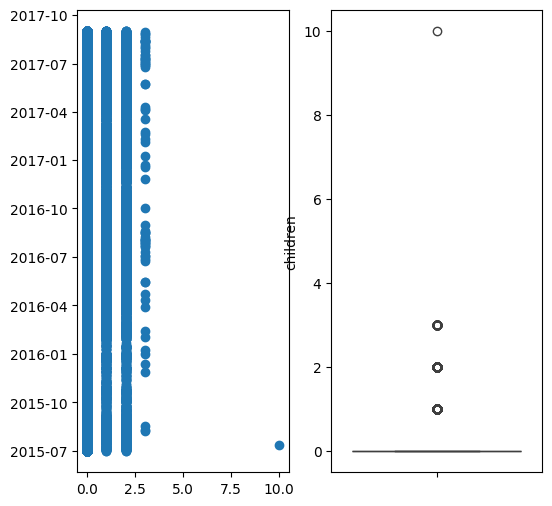

In [86]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.scatter(hotels_data_v1["children"],hotels_data_v1["Date"])


y=[i for i in range(15)]

plt.subplot(1,2,2)
sns.boxplot(hotels_data_v1["children"])
#plt.boxplot(hotels_data_v1["children"],y)
plt.show()

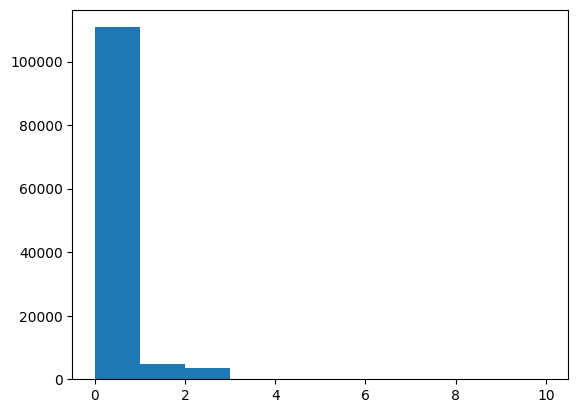

In [87]:
plt.hist(hotels_data_v1["children"],bins=10)
plt.show()

<h3> We can see that the data for children is right skewed. So when we use mean to fill the gaps it is not a good practise as the skewed data can dominates other data. So we use median here

In [88]:
hotels_data_v1_children_median=hotels_data_v1["children"].median()
hotels_data_v1["children"].fillna(hotels_data_v1_children_median,inplace=True)

/var/folders/0t/5g0v5rv176v9997qzlpjqhv00000gn/T/ipykernel_6843/1461329112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotels_data_v1["children"].fillna(hotels_data_v1_children_median,inplace=True)


<h3> So The children column is done. Now Lets Check with the country

In [89]:
hotels_data_v1.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


<h5> So I am trying to plot graphs between hotel and country to see if there is any relation between them.

In [90]:
hotels_data_v1.groupby('hotel')['hotel'].agg(['count'])

,count
hotel,
City Hotel,79330
Resort Hotel,40060


In [91]:
cityhotels_data=hotels_data_v1[hotels_data_v1['hotel']=='City Hotel']
resorthotels_data=hotels_data_v1[hotels_data_v1['hotel']=='Resort Hotel']

In [98]:
#cityhotels_data.isnull().sum()

# Since there is very few no.of missing values in the City Hotels lets ignore and just delete those rows

cityhotels_data = cityhotels_data.dropna(subset=["country"], axis=0)

KeyError: ['country']

In [93]:
cityhotels_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79330 entries, 40060 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79330 non-null  object        
 1   is_canceled                     79330 non-null  int64         
 2   lead_time                       79330 non-null  int64         
 3   arrival_date_week_number        79330 non-null  int64         
 4   stays_in_weekend_nights         79330 non-null  int64         
 5   stays_in_week_nights            79330 non-null  int64         
 6   adults                          79330 non-null  int64         
 7   children                        79330 non-null  float64       
 8   babies                          79330 non-null  int64         
 9   meal                            79330 non-null  object        
 10  market_segment                  79330 non-null  object        
 11  di

In [94]:
resorthotels_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_week_number              0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             464
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8209
company                           36952
days_in_waiting_list                  0
customer_type                         0
adr                                   0


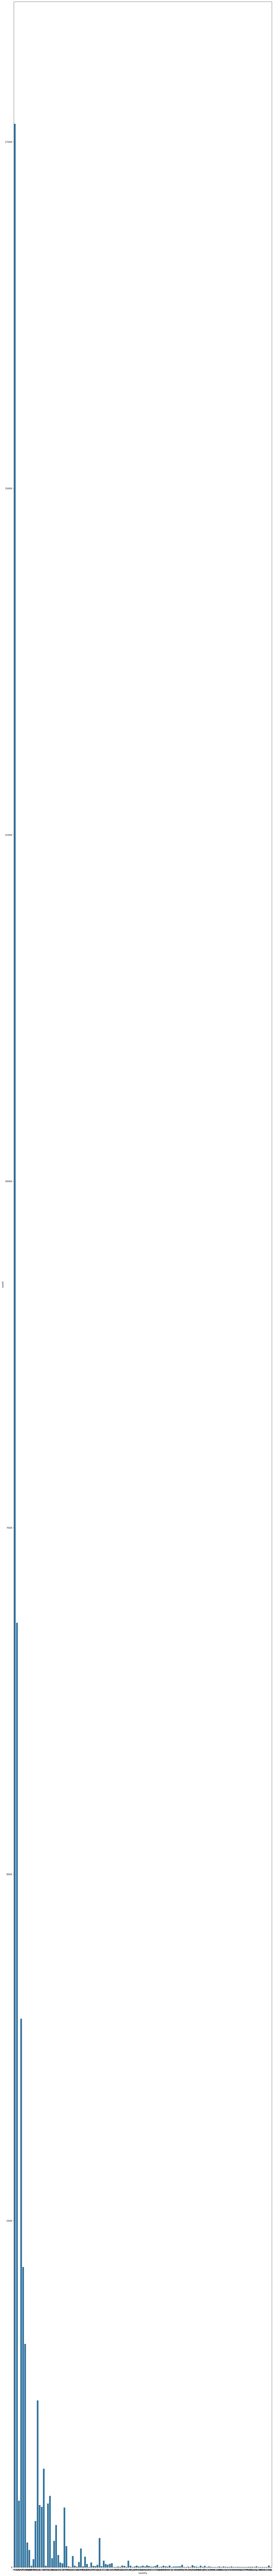

In [95]:
# Lets check from which country most peoplea are coming to this hotel
import seaborn as sns
plt.figure(figsize=(20,200))
sns.countplot(x='country', data=resorthotels_data)
plt.show()

So only 1 country is dominating for number of columns. So I am just filling up them using mode


In [100]:
countries_mode=resorthotels_data["country"].mode()[0]

resorthotels_data["country"]=resorthotels_data["country"].fillna(countries_mode)

/var/folders/0t/5g0v5rv176v9997qzlpjqhv00000gn/T/ipykernel_6843/3101131779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resorthotels_data["country"]=resorthotels_data["country"].fillna(countries_mode)


In [102]:
resorthotels_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_week_number              0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8209
company                           36952
days_in_waiting_list                  0
customer_type                         0
adr                                   0
